In [17]:
pip install -U scipy
pip install -U networkx
pip install -U matpolotlib

SyntaxError: invalid syntax (2695507806.py, line 1)

# Теоретический материал – Эволюционные методы
Деревья решений являются одним из наиболее эффективных Эволюционные методы
Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее внимание уделяется применению методов искусственного интеллекта. Генетические алгоритмы Для применения ГА необходимо:
1. выделить совокупность свойств объекта, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметровX=(x_1,x_2,...,x_n) среди x_i могут быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность решения задач не только параметрической, но и структурной оптимизации;
2. сформулировать количественную оценку полезности вариантов объекта — функцию полезности F. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщенного) критерия;
3. представить вектор X в форме хромосомы — записи следующего вида: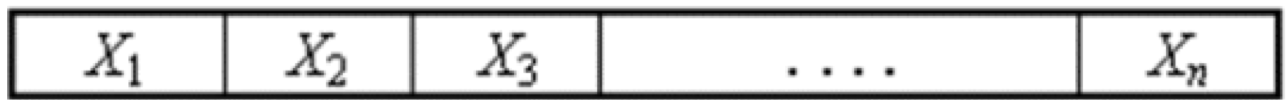
Этапы генетического алгоритма могут быть представлены в следующем виде:

for (k=0; k<G; k++) { for (j=0; j<N; j++)

{Выбор родительской пары хромосом; Кроссовер;

Мутации;

Оценка функции полезности F потомков; Селекция;

}

Замена текущего поколения новым; }

# 1.1.1 Пример

In [1]:
def qZ(x,y):
    return (x-3 * y+1)/(3 * x ** 2 + 3 * y ** 2 +1)
def qsumz (Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedID):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedID[2]]
    X[3] = oldX[sortedID[2]]
    
    X[0] = oldX[sortedID[0]]
    
    X[1] = oldX[sortedID[1]]
    
    Y[0] = oldY[sortedID[2]]
    Y[1] = oldY[sortedID[2]]
    
    Y[2] = oldY[sortedID[0]]
    
    Y[3] = oldY[sortedID[1]]
    
    return X,Y

def sorting(Z):
    sortedID = sorted(range(len(Z)),key= lambda k: Z[k])
    return sortedID
def evoStep(X,Y,Z):
    _, minId =min((value,id)for (id, value) in enumerate(Z))
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X,Y,Z

def evoSteps(X,Y,stepsNum = 4):
        result =[]
        for i in range (4):
            arrZ = [qZ1(x,Y[i])for i,x in enumerate(X)]
            X,Y,Z = evoStep(X,Y,arrZ)
            X,Y = exchangeScheme(X,Y,sorting(Z))
            result.append([X,Y,qsumz(arrZ),arrZ])
        return X,Y,result

X = [-2,-1,0,1]
Y = [-2,-1,0,1]
results = evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f'max Z: {max(qualityArrZ)}')    

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


# Задание:
Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.
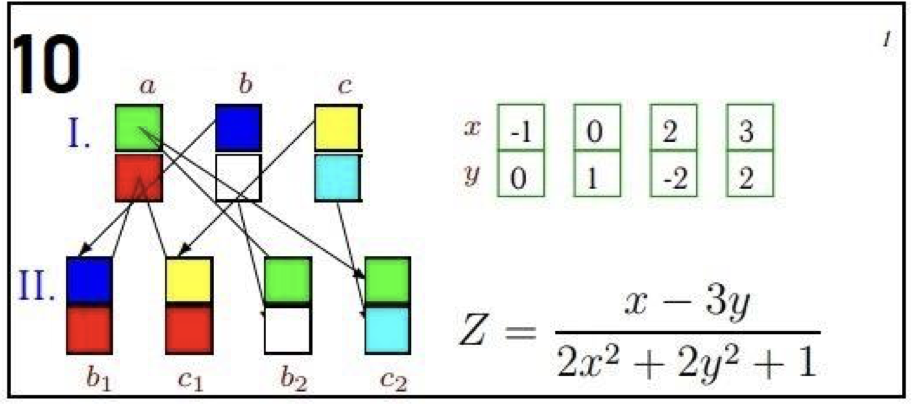

In [2]:
def qZ1(x,y):
    return (x-3*y)/(2 * x ** 2 + 2 * y ** 2 + 1)
X = [-1,0,2,3]
Y = [0,1,-2,2]
results = evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f'max Z: {max(qualityArrZ)}')    

max_1_step: -0.19
max_2_step: 0.7357692307692307
max_3_step: 0.985
max_4_step: 1.3599999999999999
max Z: 0.375


# 1.2. Теоретический материал – Метод имитации отжига
Алгоритм отжига – это метод оптимизации, который называется отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из названия, метод поиска моделирует процесс восстановления. Восстановление – это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения.
Алгоритм имитации отжига включает следующие этапы:
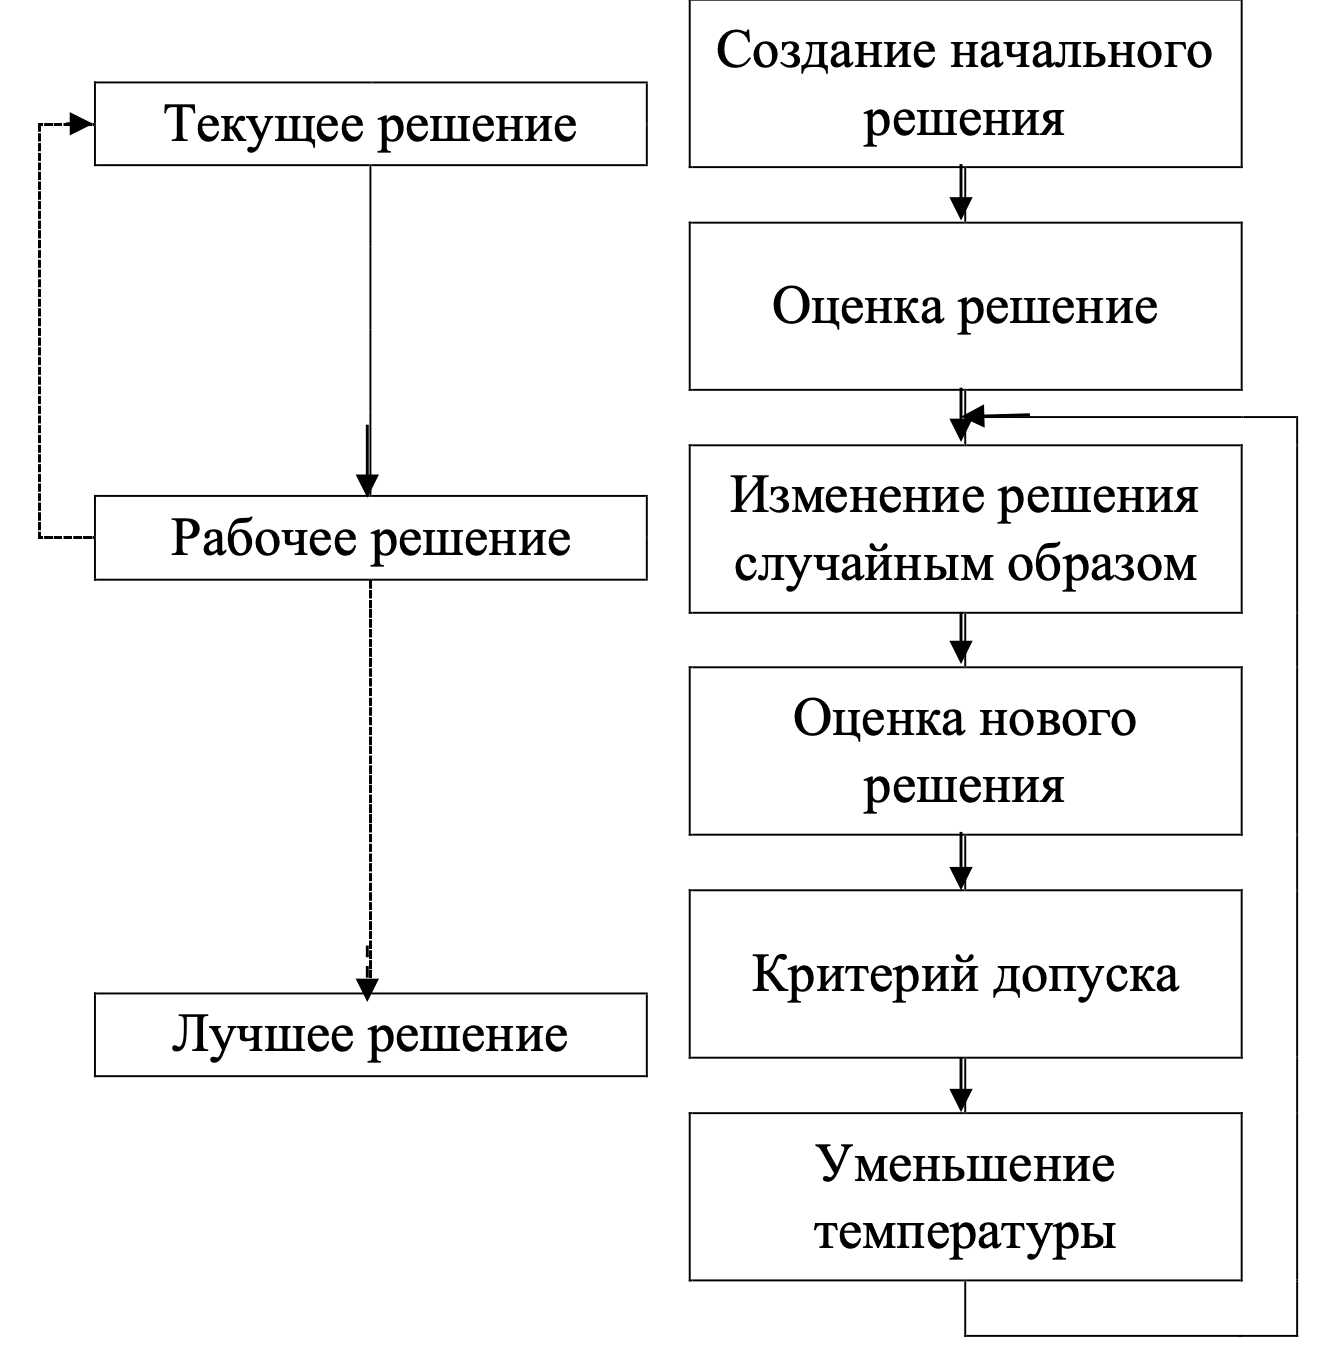
Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже приводится их краткий список:
1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещениесети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов; 7. разработка специальных цифровых фильтров.
Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением. При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.
Рассмотрим решение задачи поиска оптимального маршрута на графе методом имитации отжига Для этого, представим формальную постановку задачи и рассмотрим пример, который иллюстрирует алгоритм решения.
Итак, необходимо Найти длину гамильтонова цикла 𝑆4 в полном графе 𝐾 послечетырехцикловрешениязадачиметодомотжига.Данырасстояния
6
𝐿𝑖,𝑗 между вершинами. Даны также: начальная последовательность вершин
𝐿0, последовательность замен вершин 𝑍 и выпавшие при этом вероятности перехода 𝑃 ,𝑘 = 1,...,4.
𝑃 = 100 ∗
𝑘
Переход на худшее (∆𝑆𝑘 = 𝑆𝑘 − 𝑆𝑘−1 > 0) решение допустим, если
где снижение температуры происходит по закону 𝑇 = 0.5𝑇 от 𝑘+1 𝑘
𝑇 =100.

#  1.2.1 Пример

In [5]:
import networkx as nx
from math import e

In [29]:
distances = [
(1, 2, 20),
(1, 3, 40),
(1, 4, 42),
(1, 5, 33),
(1, 6, 21),
(2, 3, 26),
(2, 4, 38),
(2, 5, 42),
(2, 6, 17),
(3, 4, 22),
(3, 5, 43),
(3, 6, 21),
(4, 5, 27),
(4, 6, 22),
(5, 6, 26)]
V = [1,4,5,2,6,3,1]
Z = [(3, 4),(4, 6),(5, 2),(6, 2)] 
P = [49, 54, 43, 54]
T = 100 

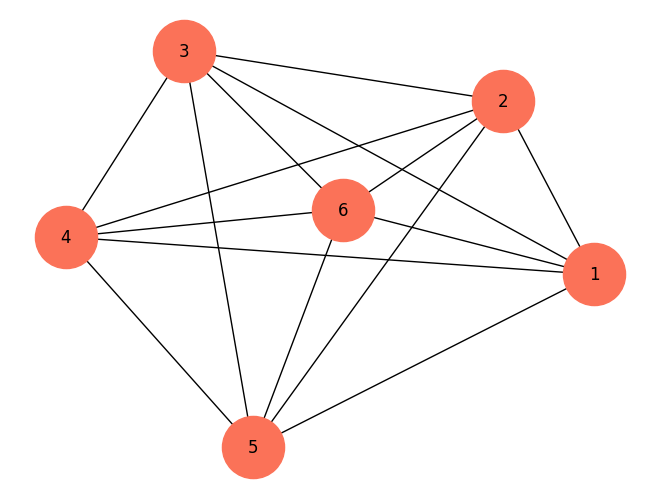

In [27]:

def probability(delta, T):
    return 100 * e **(-delta / T)
def reduceTemp(prevT):
    nextT = 0.5 * prevT
    return nextT
    
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph,node_color = '#fb7258', node_size = 2000, with_labels = True)

In [19]:
def edgeLength(i,j,distances,roundTrip = True):
    if(roundTrip):
        return max([(item[2] if (item[0] == i and item[1] ==j) or (item[1]==i and item[0]==j)else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] ==j) else -1) for item in distances])
    

In [20]:
def routeLength(V,distances):
    edges = []
    
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)

In [21]:
def routeOneReplace(arrV,Z,replaceByName = True):
    decrement = 1 if replaceByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]= arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV


In [22]:
def routeReplacement(V,Z):
    for z in Z:
        V = routeOneReplace(V,z)
    return V

In [23]:
def choseRoute(distances,V,Z,T,P):
    sumLength = routeLength(V,distances)
    arrSum = [sumLength]
    for i in range (len(Z)):
        newV = routeOneReplace(V[:],Z[i])
        newS = routeLength(newV,distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if(deltaS>0):
            p = probability(deltaS,T)
            if(p>P[i]):
                V=newV
                sumLength= newS
        else:
            V = newV
            sumLength = newS
        T = reduceTemp(T)
    return V, arrSum

In [33]:
def drawRouteGraph(distances,bestRoute):
    newDistance = []
    for i in range(len(bestRoute)-1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistance.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistance)
    nx.draw_kamada_kawai(graph,node_color = '#fb7258',node_size = 2000, with_labels = True)

лучший маршрут: [1, 6, 2, 3, 4, 5, 1]
length of chosen rroute 146
Length of all routes: [189, 209, 186, 146, 166]


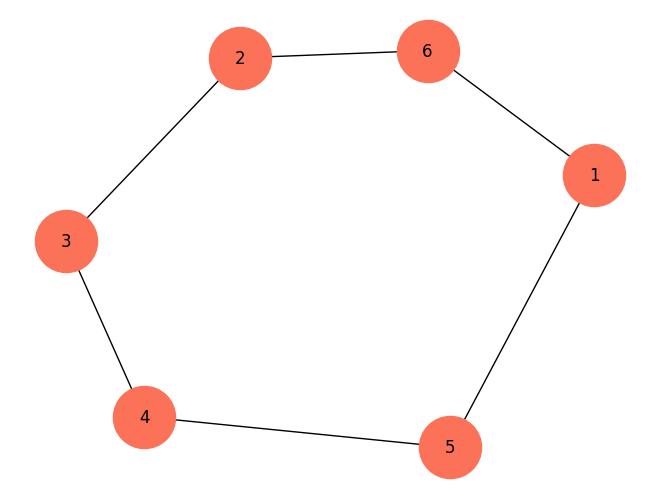

In [34]:
bestRoute,arrLength = choseRoute(distances,V,Z,T,P)
print(f'лучший маршрут: {bestRoute}')
print(f'length of chosen rroute {routeLength(bestRoute,distances)}')
print(f'Length of all routes: {arrLength}')
drawRouteGraph(distances,bestRoute)

In [35]:
distances = [
(1, 2, 25),
(1, 3, 41),
(1, 4, 38),
(1, 5, 27),
(1, 6, 20),
(2, 3, 21),
(2, 4, 34),
(2, 5, 39),
(2, 6, 17),
(3, 4, 24),
(3, 5, 40),
(3, 6, 22),
(4, 5, 21),
(4, 6, 21),
(5, 6, 22)]
V = [1,3,5,4,6,2,1]
Z = [(3, 4),(4, 6),(5, 6),(2, 4)] 
P = [41, 60, 85, 60]

лучший маршрут: [1, 2, 4, 3, 6, 5, 1]
length of chosen rroute 154
Length of all routes: [165, 150, 165, 180, 154]


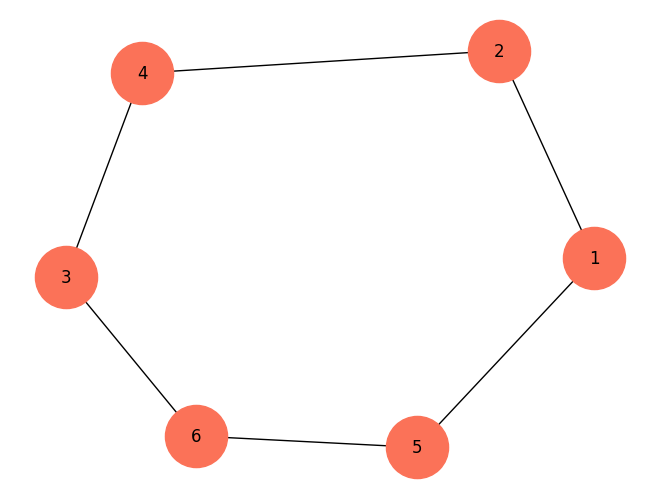

In [36]:
bestRoute,arrLength = choseRoute(distances,V,Z,T,P)
print(f'лучший маршрут: {bestRoute}')
print(f'length of chosen rroute {routeLength(bestRoute,distances)}')
print(f'Length of all routes: {arrLength}')
drawRouteGraph(distances,bestRoute)